<a href="https://colab.research.google.com/github/wpwo98/IDS-CB35533/blob/main/%EC%B5%9C%EC%9E%AC%EC%9B%90_Midterm_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Q2. Image Compression (10pts)
Convert the following image to a 16-color image.
Use K means clustering.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2022)


The original image is given below.

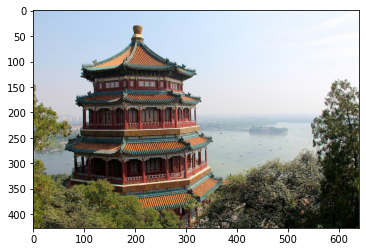

In [ ]:
from sklearn.datasets import load_sample_image
# add the code below
china = load_sample_image("china.jpg")
plt.imshow(china)
img = load_sample_image("china.jpg")
china = load_sample_image("china.jpg")


In [ ]:
# TODO
pixels = img.reshape((-1,3))
pixels = np.float32(pixels)
print(pixels.shape)

from copy import deepcopy
new_pixels = deepcopy(pixels)
# Blue light filter 
new_pixels[:,2] = new_pixels[:,2] * 0.7
new_pixels = np.uint8(new_pixels)

# Reshape 
result_img = new_pixels.reshape(img.shape)


def init(ds, k, random_state=42):
    np.random.seed(random_state)
    centroids = [ds[0]]

    for _ in range(1, k):
        dist_sq = np.array([min([np.inner(c-x,c-x) for c in centroids]) for x in ds])
        probs = dist_sq/dist_sq.sum()
        cumulative_probs = probs.cumsum()
        r = np.random.rand()
        
        for j, p in enumerate(cumulative_probs):
            if r < p:
                i = j
                break
        
        centroids.append(ds[i])

    return np.array(centroids)

k = 16
centroids = init(pixels, k, random_state=42)
print(centroids)

# First centroid
centroids[0]
print(centroids[0])

# TODOs: Calculate distances between all points and the initial centroids.
n = pixels.shape[0]
c = pixels.shape[1]
clusters = np.zeros(n)
distances = np.zeros((n,k))
for i in range(k):                        # Measure the distance to every center
  distances[:,i] = np.linalg.norm(pixels - centroids[i], axis=1)
#print(distances)

# TODOs: Assign all points to their closest centroid.
clusters = np.argmin(distances, axis = 1) # Assign all training data to closest center
pixnum_FirstCluster = sum(clusters == 0)
print(pixnum_FirstCluster)

centroids_old = deepcopy(centroids)
centroids_new = np.zeros(centroids.shape)

# TODOs: Update centoids
print("centroids_old")
print(centroids_old)
#print(centroids_new)

for i in range(k):
  centroids_new[i] = np.mean(pixels[clusters==i], axis=0)
print("\ncentroids_new")
print(centroids_new)

# TODOs: Calculate SSE
sse = np.linalg.norm(centroids_new - centroids_old)
sse = np.power(sse, 2)
# centroid와의 거리의 제곱의 합
print(sse)

centroids = init(pixels, k, random_state=42)

# Initial labels for each pixel 
clusters = np.zeros(pixels.shape[0]) 
error = np.linalg.norm(centroids_new - centroids_old)
n = pixels.shape[0]
distances = np.zeros((n,k))
centroids_old = np.zeros(centroids.shape)
centroids_new = deepcopy(centroids)
iteration_cnt = 0

# TODOs                     # Clustering.ipynb 참조.
while error != 0:
    # Measure the distance to every center
    for i in range(k):
        distances[:,i] = np.linalg.norm(pixels - centroids_new[i], axis=1)

    # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1)
    
    centroids_old = deepcopy(centroids_new)

    # Calculate mean for every cluster and update the centroid
    for i in range(k):
        centroids_new[i] = np.mean(pixels[clusters == i], axis=0)

    error = np.linalg.norm(centroids_new - centroids_old)
    iteration_cnt = iteration_cnt + 1
    #print(error)

#print(centroids_new)
print(iteration_cnt)

pixels_new = np.zeros(pixels.shape)

for i in range(k):
  pixels_new[clusters==i] = centroids_new[i]

pixels_new = np.uint8(pixels_new)
result_img = pixels_new.reshape(img.shape)
imshow(result_img)

(273280, 3)


NameError: ignored